In [28]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from tensorflow.keras.models  import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.callbacks  import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
file_path = '/home/arnav28/Documents/blood/dataset_blood_group'

In [3]:
name_class = os.listdir(file_path)
name_class

['A-', 'B+', 'AB+', 'B-', 'A+', 'O-', 'O+', 'AB-']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths[-6:-1]

['/home/arnav28/Documents/blood/dataset_blood_group/AB-/cluster_5_4704.BMP',
 '/home/arnav28/Documents/blood/dataset_blood_group/AB-/cluster_5_2416.BMP',
 '/home/arnav28/Documents/blood/dataset_blood_group/AB-/cluster_5_5257.BMP',
 '/home/arnav28/Documents/blood/dataset_blood_group/AB-/cluster_5_769.BMP',
 '/home/arnav28/Documents/blood/dataset_blood_group/AB-/cluster_5_5060.BMP']

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',
 'A-',

In [7]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels , name = 'Label')
data = pd.concat([filepath , labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/home/arnav28/Documents/blood/dataset_blood_gr...,AB-
1,/home/arnav28/Documents/blood/dataset_blood_gr...,A-
2,/home/arnav28/Documents/blood/dataset_blood_gr...,O-
3,/home/arnav28/Documents/blood/dataset_blood_gr...,O+
4,/home/arnav28/Documents/blood/dataset_blood_gr...,O-


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  6000 non-null   object
 1   Label     6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

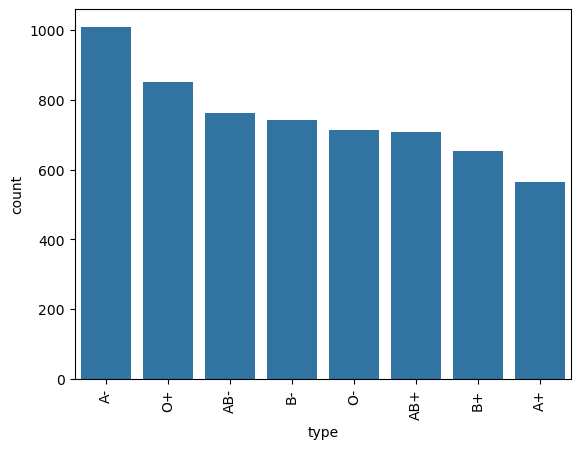

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index , y =counts)
plt.xlabel('type')
plt.xticks(rotation=90)

In [10]:
train, test = train_test_split(data , test_size = 0.25 , random_state = 42)

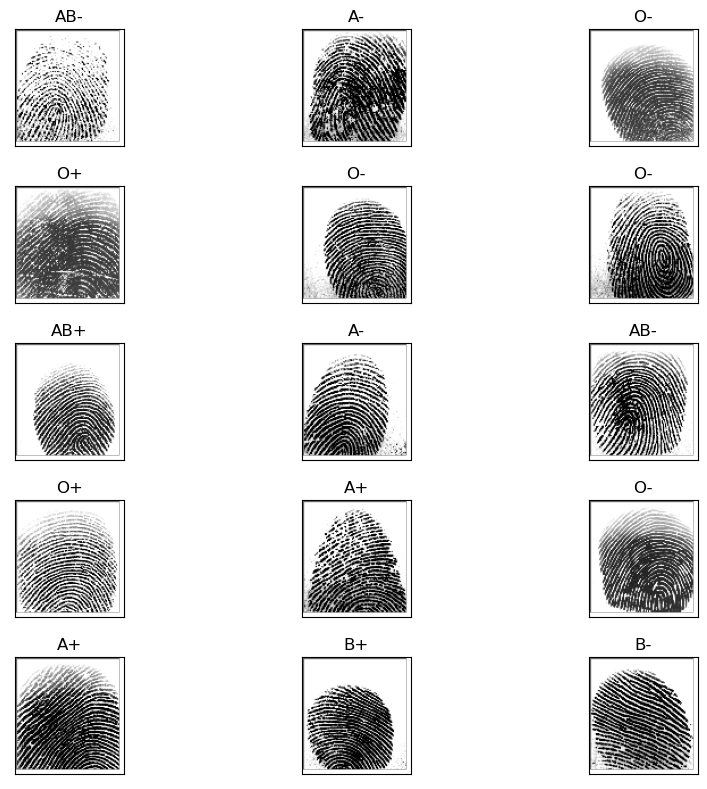

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

plt.tight_layout()
plt.show()

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [13]:
train_gen = train_datagen.flow_from_dataframe(
  dataframe=train,
  x_col='Filepath',
  y_col= 'Label',
  target_size = (256,256),
  class_mode='categorical',
  batch_size = 32,
  shuffle = True,
  seed=42,
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size = 32,
    shuffle = False,
    seed = 42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col = 'Label',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 4500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.


In [14]:
pretrained_model = ResNet50(
    input_shape = (256,256,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

I0000 00:00:1729363812.288229   15303 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 00:20:12.291566: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
inputs = pretrained_model.input
x=Dense(128, activation='relu')(pretrained_model.output)
x=Dense(128, activation='relu')(x)

outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',
min_delta=0,
patience=2,
mode='auto')]

In [20]:
history = model.fit(
    train_gen,
    validation_data = valid_gen,
    epochs=10
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.8954 - loss: 0.2609 - val_accuracy: 0.7847 - val_loss: 0.6039
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9092 - loss: 0.2323 - val_accuracy: 0.7853 - val_loss: 0.6092
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.8963 - loss: 0.2583 - val_accuracy: 0.7787 - val_loss: 0.6947
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.9221 - loss: 0.2066 - val_accuracy: 0.7880 - val_loss: 0.6559
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.9389 - loss: 0.1628 - val_accuracy: 0.8080 - val_loss: 0.5491
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.9484 - loss: 0.1433 - val_accuracy: 0.7753 - val_loss: 0.7173
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.9157 - loss: 0.2081 - val_accuracy: 0.7733 - val_loss: 0.7039
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.9179 - loss: 0.2169 - val_accu

In [21]:
model.save("model_blood_group_detection.h5")

In [22]:
model.save("model_blood_group_detection.keras")

In [25]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(valid_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7810 - loss: 0.7617
Test Accuracy: 78.20%


In [26]:
# Generate predictions
predictions = model.predict(valid_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = valid_gen.classes

47/47 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step


In [27]:
# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=valid_gen.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

          A+       0.88      0.76      0.81       138
          A-       0.81      0.68      0.74       245
         AB+       0.75      0.83      0.79       171
         AB-       0.72      0.85      0.78       208
          B+       0.70      0.89      0.78       162
          B-       0.85      0.93      0.89       198
          O+       0.76      0.81      0.78       213
          O-       0.90      0.50      0.65       165

    accuracy                           0.78      1500
   macro avg       0.80      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500



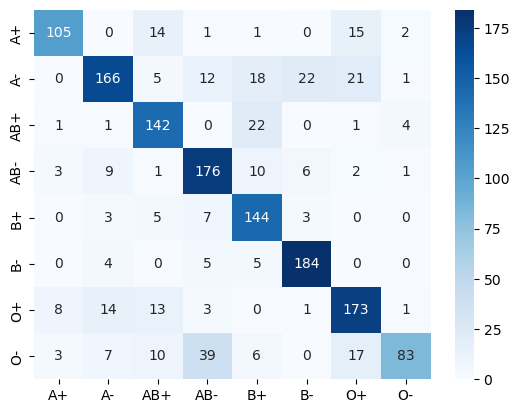

In [30]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_gen.class_indices.keys(), yticklabels=valid_gen.class_indices.keys())
plt.show()